# Introduction to text analysis VI #

## Topic detection ##

One of the most important tasks in text analysis is the topic detection, i.e. assigning one or more topics to a document or to a set of documents.

To guess the most important features of a document, that eventually will become the "topics", we need to start from the frequency and importance of the words in a document. 

In [1]:
import nltk
import codecs

text = codecs.open("inaug_speeches.csv","r","iso-8859-2").read()

tokens = nltk.word_tokenize(text)

In [2]:
all_words = nltk.FreqDist(w.lower() for w in tokens)

In [3]:
for a,f in all_words.items():
    print(a,f)
    break

cooperative 3


**sorting the resulting dictionary by value**

In [3]:
import operator

sorted_frequencies = sorted(all_words.items(), key=operator.itemgetter(1), reverse = True)

In [4]:
for s in sorted_frequencies[0:10]:
    print(s)

('the', 10102)
(',', 7408)
('of', 7112)
('and', 5317)
('.', 4859)
('to', 4531)
('in', 2788)
('a', 2252)
('our', 2185)
('that', 1794)


**not surprisingly stopwords are on the top of the frequencies**

the tail of frequencies

In [5]:
sorted_frequencies[-10:-1]

[('complaining', 1),
 ('arrives', 1),
 ('mysteries', 1),
 ('brown', 1),
 ('bleed', 1),
 ('urban', 1),
 ('sprawl', 1),
 ('wind-swept', 1),
 ('nebraska', 1)]

**sorting the dictionary using pandas**

In [8]:
import pandas as pd

In [9]:
dfreq = pd.DataFrame.from_dict(all_words,orient="index")

In [10]:
ndf = pd.DataFrame({'word' : dfreq.index, 'freq' : [d[0] for d in dfreq.values]})

In [11]:
ndf.head()

,word,freq
0,``,234
1,",",7408
2,'',824
3,name,14
4,inaugural,62


In [12]:
ndf.sort_values(by='freq',ascending=False).head(30)

,word,freq
18,the,10102
1,",",7408
17,of,7112
20,and,5317
53,.,4859
27,to,4531
75,in,2788
69,a,2252
404,our,2185
39,that,1794


In [13]:
ndf[ndf['freq'] == 27]

,word,freq
254,private,27
392,views,27
455,sacred,27
628,endeavor,27
800,provide,27
825,hearts,27
916,mere,27
1071,constant,27
1152,preserved,27
1299,though,27


**sorting and plotting : rediscovering the Zipf law**

In [14]:
sorted_freqs = ndf.sort_values(by='freq',ascending=False)

In [15]:
vals = list(sorted_freqs['freq'])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


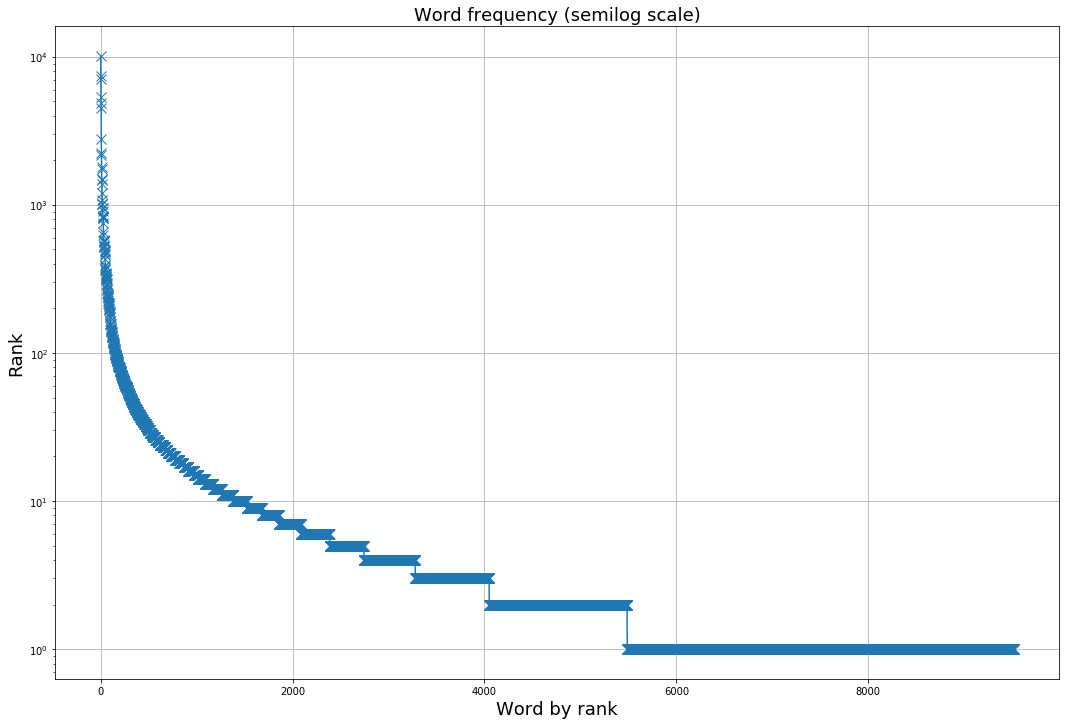

In [16]:
%pylab inline

fig = plt.figure(figsize=(18,12))
ax = plt.gca()
ax.plot(np.arange(len(vals)), vals, marker = "x", markersize=10)
ax.set_yscale('log')
ax.set_xlabel('Word by rank',fontsize=18)
ax.set_ylabel('Rank',fontsize=18)
ax.set_title('Word frequency (semilog scale)',fontsize=18)
plt.grid()

Populating the interactive namespace from numpy and matplotlib


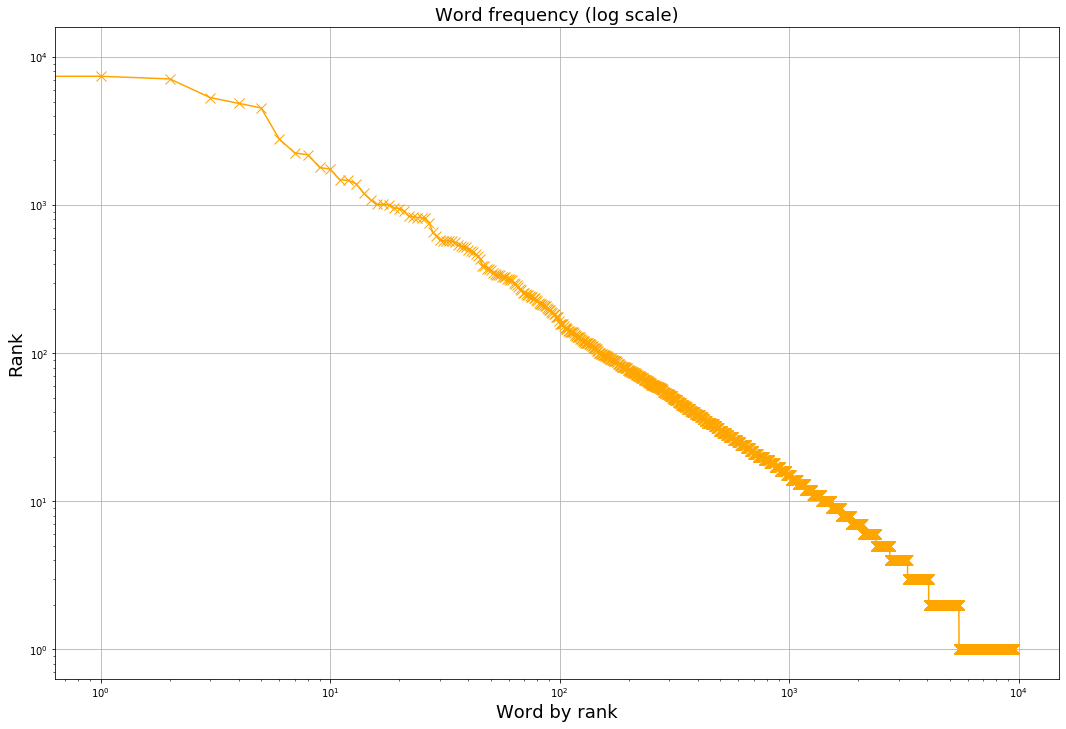

In [17]:
%pylab inline

fig = plt.figure(figsize=(18,12))
ax = plt.gca()
ax.plot(np.arange(len(vals)), vals, marker = "x", markersize=10,color="orange")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Word by rank',fontsize=18)
ax.set_ylabel('Rank',fontsize=18)
ax.set_title('Word frequency (log scale)',fontsize=18)
plt.grid()

## tag cloud how to ##

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from wordcloud import WordCloud, STOPWORDS


In [23]:
csvin = "inaug_speeches.csv"

documents = []
presidents = {}
with codecs.open(csvin,"r","iso-8859-2") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        text = row['text']
        president = row['Name']
        text = text.lower()
        if(president in presidents):
            presidents[president] += text
        else:
            presidents[president] = text
        


In [24]:
washington_speech = presidents['George Washington']

In [27]:

w_mask = np.array(Image.open("wash.jpg"))

stopwords = set(STOPWORDS)
stopwords.add('will')


wc = WordCloud(background_color="white", max_words=2000, mask=w_mask, stopwords=stopwords)
# generate word cloud
wc.generate(washington_speech)

# store to file
wc.to_file("washington_wcloud.png")


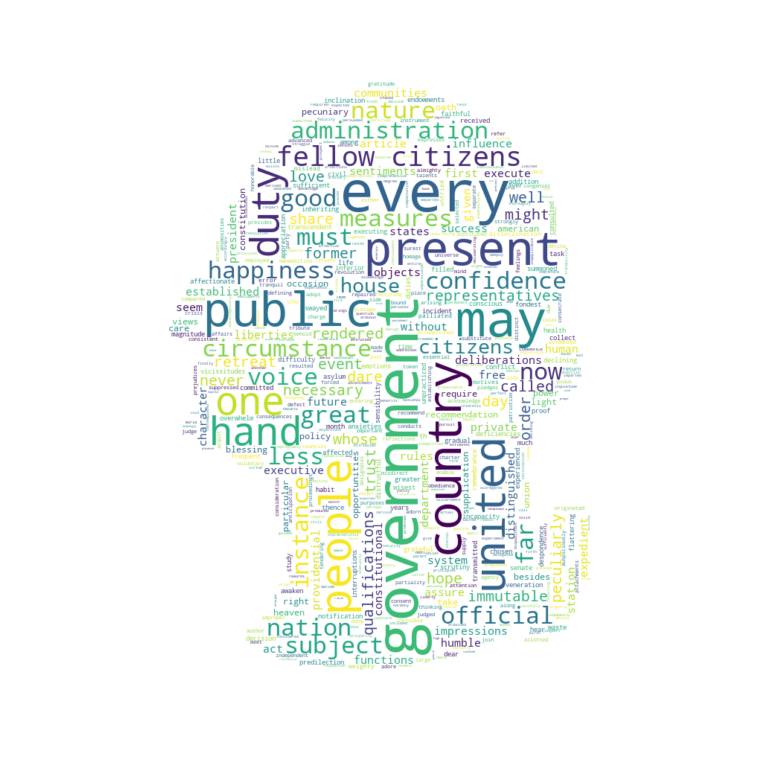

In [28]:
# show
fig = plt.figure(figsize=(20,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [29]:
trump_speech = presidents['Donald J. Trump']

In [35]:

t_mask = np.array(Image.open("trump2.png"))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", max_words=2000, mask=t_mask, stopwords=stopwords)
# generate word cloud
wc.generate(trump_speech)

# store to file
wc.to_file("trump_wcloud.png")

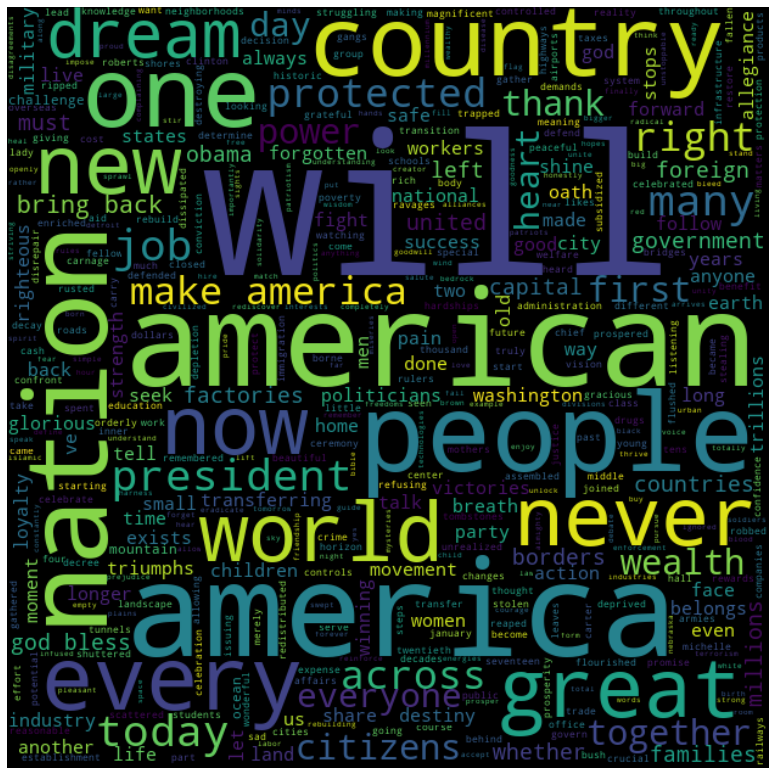

In [36]:
# show
fig = plt.figure(figsize=(20,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

### Exercises ###

**Experiment with WordCloud**

**Zipf law from large corpora**

**Zipf law for different languages**

**Zipf law from wikipedia dumps**